### **`1.`** Importing required packages for cleaning input dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [3]:
Calories_Burnt_df = pd.read_csv("exercise_dataset.csv")

Calories_Burnt_df

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825
...,...,...,...,...,...,...
243,General cleaning,207,246,286,326,0.721008
244,"Cleaning, dusting",148,176,204,233,0.515199
245,Taking out trash,177,211,245,279,0.617427
246,"Walking, pushing a wheelchair",236,281,327,372,0.823236


In [4]:
Calories_Burnt_df.columns

Index(['Activity, Exercise or Sport (1 hour)', '130 lb', '155 lb', '180 lb',
       '205 lb', 'Calories per kg'],
      dtype='object')

### **`2.`** Data Cleaning for further easier processing of data in Tableau

#### **-- Converting & Rounding off the lbs to Kgs for easier interpretation**

In [6]:
Calories_Burnt_df.rename({'130 lb': '59 Kgs', '155 lb': '70 Kgs', '180 lb': '82 Kgs', '205 lb': '93 Kgs'}, axis=1, inplace=True)

Calories_Burnt_df.columns

Index(['Activity, Exercise or Sport (1 hour)', '59 Kgs', '70 Kgs', '82 Kgs',
       '93 Kgs', 'Calories per kg'],
      dtype='object')

#### **-- Checking for null values in the dataset**

In [16]:
Calories_Burnt_df.isnull().sum()

Activity, Exercise or Sport (1 hour)    0
59 Kgs                                  0
70 Kgs                                  0
82 Kgs                                  0
93 Kgs                                  0
Calories per kg                         0
dtype: int64

**Explanation:** No null values found, if any found we need to either remove the entire row or fill in the null values with some value for further proceeding.

#### **-- Filtering out the set of activities required for our interpretation**

In [8]:
Calories_Burnt_df_filtered = Calories_Burnt_df[Calories_Burnt_df['Activity, Exercise or Sport (1 hour)'].isin(["Aerobics, general", "Archery", "Badminton", "Basketball game, competitive", 
                                                                                  "Billiards", "Bowling", "Boxing, punching bag", "Canoeing, camping trip", "Carrying heavy loads", 
                                                                                  "Cricket (batting, bowling)", "Cycling, mountain bike, bmx", "Football, competitive", "Golf, driving range", 
                                                                                  "Ice skating, rapidly"])]

Calories_Burnt_df_filtered.reset_index(drop=True, inplace=True)

print("Final Filtered Dataset is as follows: \n", '-'*100)

Calories_Burnt_df_filtered

Final Filtered Dataset is as follows: 
 ----------------------------------------------------------------------------------------------------


,"Activity, Exercise or Sport (1 hour)",59 Kgs,70 Kgs,82 Kgs,93 Kgs,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730
1,"Aerobics, general",384,457,531,605,1.338435
2,Archery,207,246,286,326,0.721008
3,Badminton,266,317,368,419,0.927494
4,"Basketball game, competitive",472,563,654,745,1.647825
5,Billiards,148,176,204,233,0.515199
6,Bowling,177,211,245,279,0.617427
7,"Boxing, punching bag",354,422,490,558,1.234853
8,"Cricket (batting, bowling)",295,352,409,465,1.029722
9,"Football, competitive",531,633,735,838,1.852957


#### **-- Saving the Dataset to a CSV file for further processing of data in Tableau**

In [9]:
Calories_Burnt_df_filtered.to_csv("Filtered_Calories_Burnt_Data.csv", index = False)

### **`3.`** Data Visualization in Python

In [10]:
activities_list = Calories_Burnt_df_filtered.iloc[:, 0]
kgs_59 = Calories_Burnt_df_filtered.iloc[:, 1]
kgs_70 = Calories_Burnt_df_filtered.iloc[:, 2]
kgs_82 = Calories_Burnt_df_filtered.iloc[:, 3]
kgs_93 = Calories_Burnt_df_filtered.iloc[:, 4]
calories_lost_perkg = Calories_Burnt_df_filtered.iloc[:, -1]

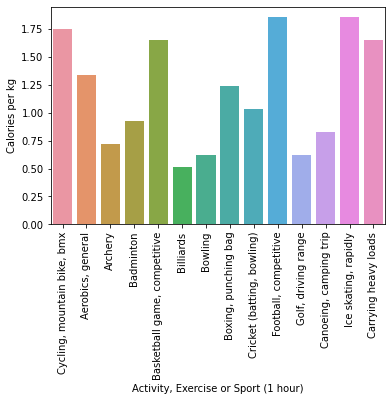

In [11]:
sn.barplot(activities_list, calories_lost_perkg)
plt.xticks(rotation=90)
plt.show()

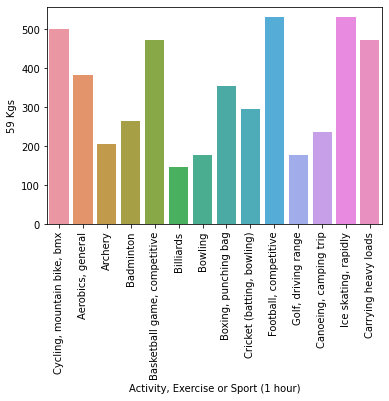

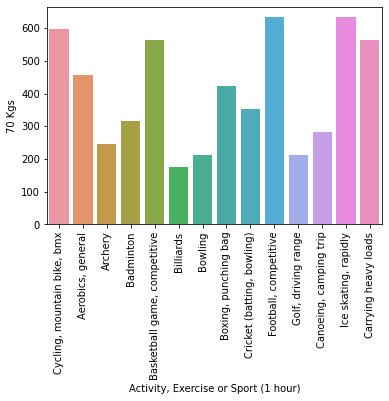

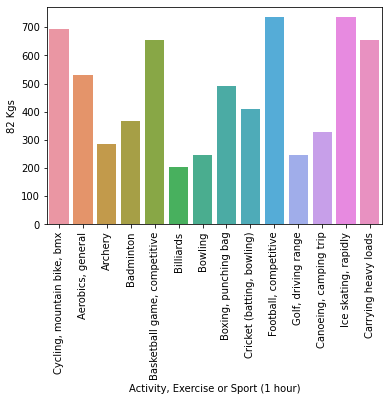

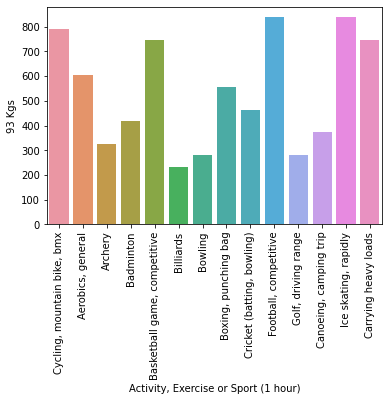

In [12]:
sn.barplot(activities_list, kgs_59)
plt.xticks(rotation=90)
plt.show()

sn.barplot(activities_list, kgs_70)
plt.xticks(rotation=90)
plt.show()

plt.bar(activities_list, kgs_82)
sn.barplot(activities_list, kgs_82)
plt.xticks(rotation=90)
plt.show()

plt.bar(activities_list, kgs_93)
sn.barplot(activities_list, kgs_93)
plt.xticks(rotation=90)
plt.show()